In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)
    
    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

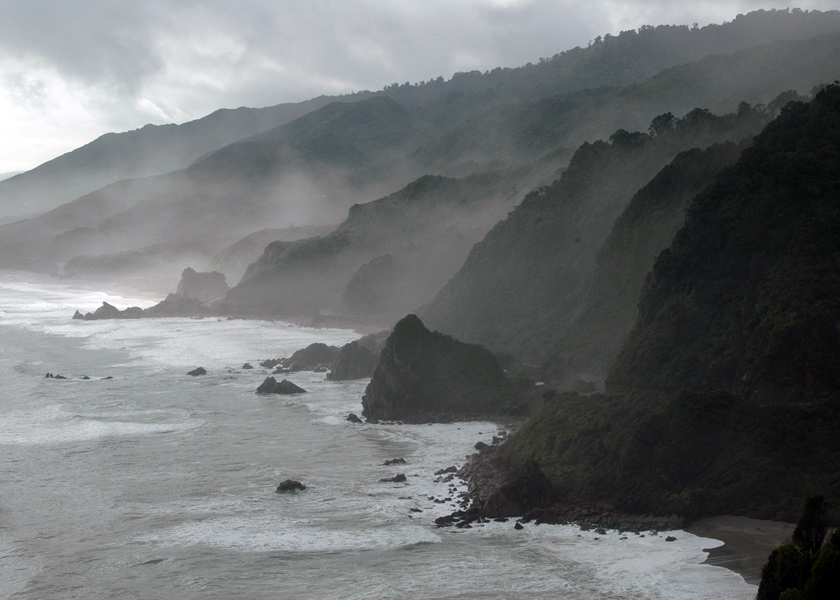

In [5]:
img_bgr = cv2.imread('New_Zealand_Coast.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

Image(filename='New_Zealand_Coast.jpg')

# Adjust Brightness

Text(0.5, 1.0, 'Brighter')

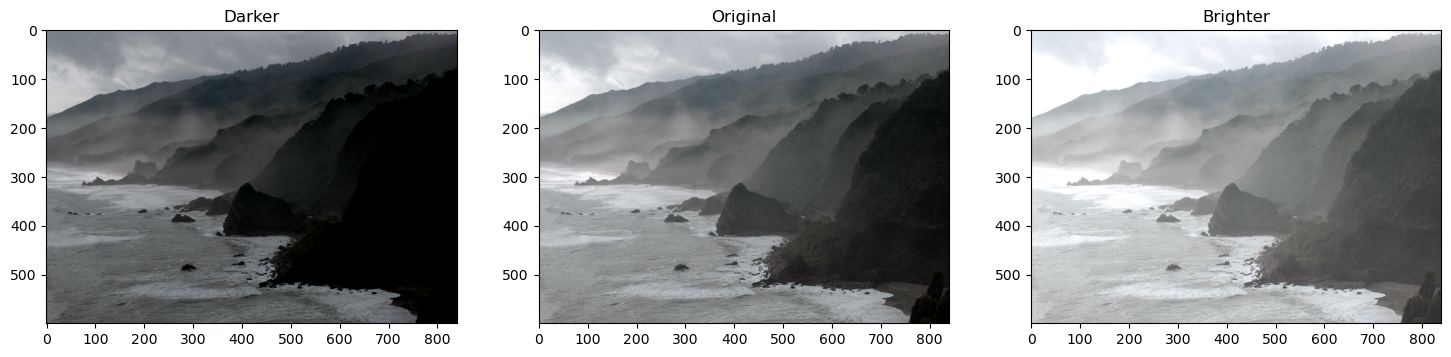

In [6]:
matrix = np.ones(img_bgr.shape, dtype='uint8') * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

# show images
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(img_rgb_darker); plt.title('Darker')
plt.subplot(132);plt.imshow(img_rgb); plt.title('Original')
plt.subplot(133);plt.imshow(img_rgb_brighter); plt.title('Brighter')

# Adjust Contrast

Text(0.5, 1.0, 'Brighter')

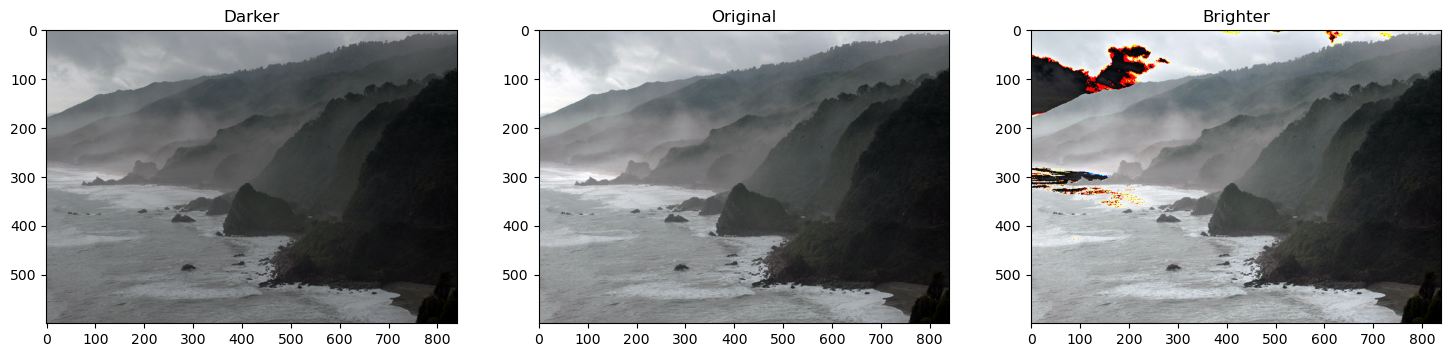

In [7]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

# show images
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(img_rgb_darker); plt.title('Darker')
plt.subplot(132);plt.imshow(img_rgb); plt.title('Original')
plt.subplot(133);plt.imshow(img_rgb_brighter); plt.title('Brighter')

## Handling overflow using np.clip

Text(0.5, 1.0, 'Brighter')

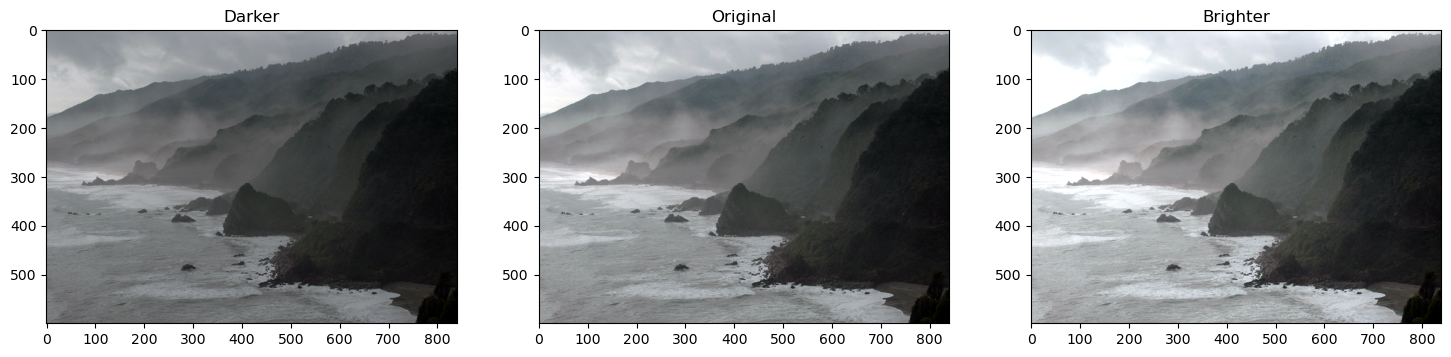

In [8]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_lower = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2), 0, 255))

# show images
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(img_rgb_lower); plt.title('Darker')
plt.subplot(132);plt.imshow(img_rgb); plt.title('Original')
plt.subplot(133);plt.imshow(img_rgb_higher); plt.title('Brighter')

# Image Threshold

Text(0.5, 1.0, 'Threshold')

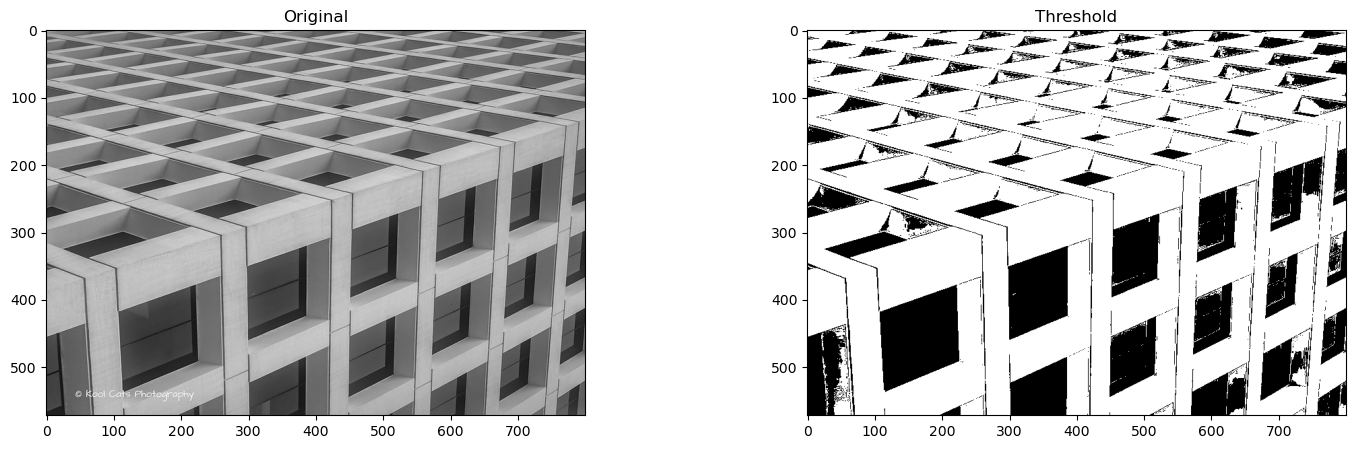

In [9]:
img_read = cv2.imread('building-windows.jpg', cv2.IMREAD_GRAYSCALE)
retval, image_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

# show images
plt.figure(figsize=[18,5])
plt.subplot(121);plt.imshow(img_read, cmap='gray'); plt.title('Original')
plt.subplot(122);plt.imshow(image_thresh, cmap='gray'); plt.title('Threshold')

### Application: Music Sheet Reader

Text(0.5, 1.0, 'Adaptive')

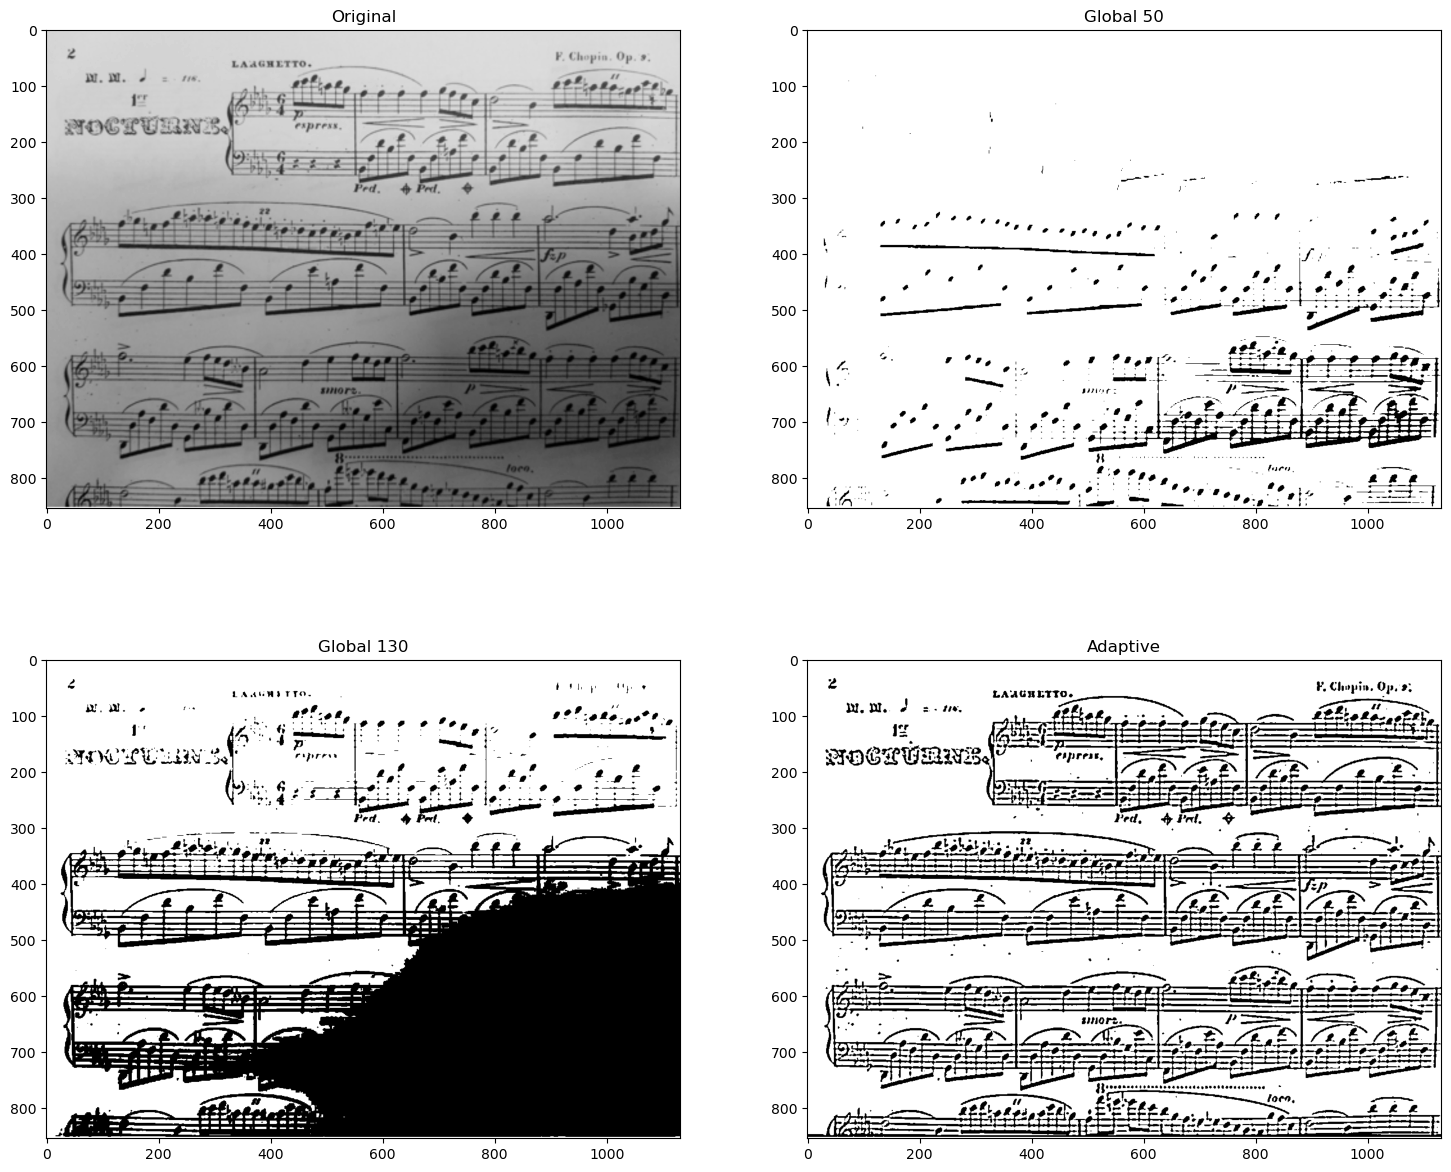

In [10]:
img_read = cv2.imread('Piano_Sheet_Music.png', cv2.IMREAD_GRAYSCALE)

# global threshold
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# global threshold
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# adaptive threshold
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plt.figure(figsize=[18,15])
plt.subplot(221);plt.imshow(img_read, cmap='gray'); plt.title('Original')
plt.subplot(222);plt.imshow(img_thresh_gbl_1, cmap='gray'); plt.title('Global 50')
plt.subplot(223);plt.imshow(img_thresh_gbl_2, cmap='gray'); plt.title('Global 130')
plt.subplot(224);plt.imshow(img_thresh_adp, cmap='gray'); plt.title('Adaptive')

# Bitwise Operations

(200, 499)


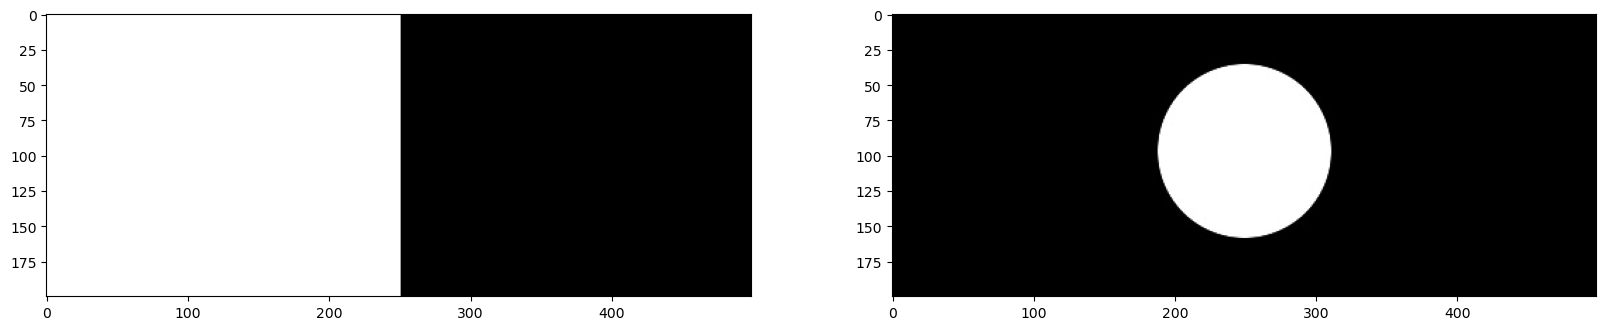

In [13]:
img_rec = cv2.imread('rectangle.jpg', cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread('circle.jpg.', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20,5])
plt.subplot(121); plt.imshow(img_rec, cmap='gray')
plt.subplot(122); plt.imshow(img_cir, cmap='gray')
print(img_rec.shape)

### Bitwise AND Operation

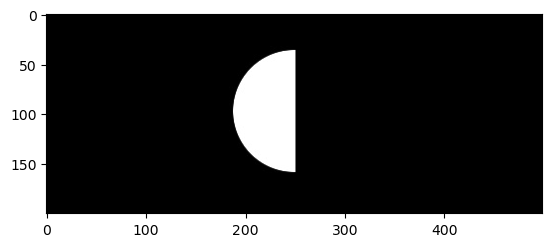

In [14]:
result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap='gray')

### Bitwise OR Operation

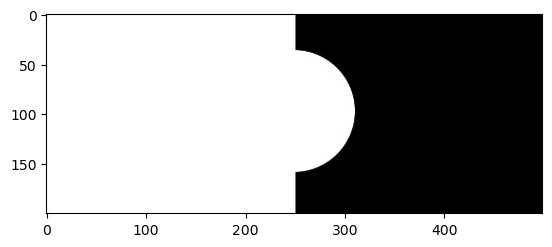

In [15]:
result = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap='gray')

### Bitwise XOR Operation

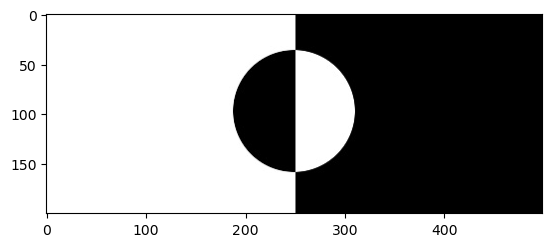

In [16]:
result = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap='gray')

## Application: Logo Manipulation

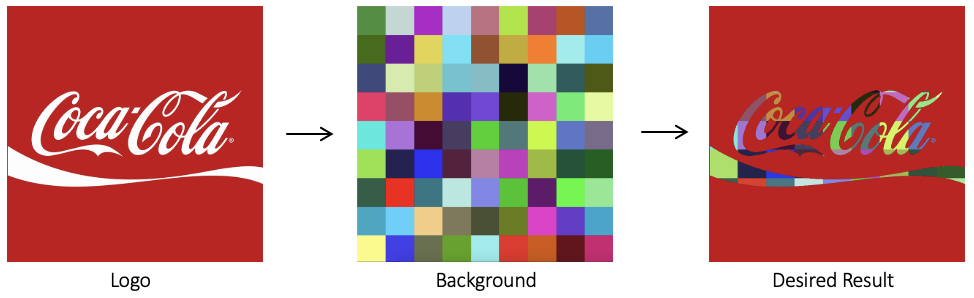

In [17]:
Image(filename='Logo_Manipulation.png')

(700, 700, 3)


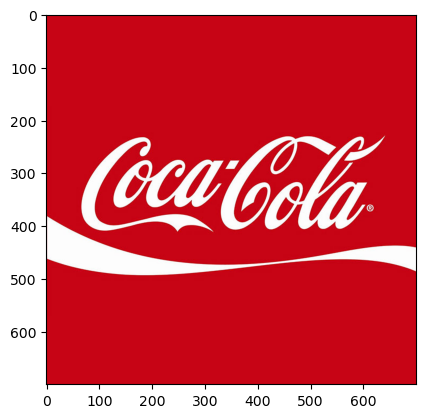

In [18]:
img_bgr = cv2.imread('coca-cola-logo.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)
logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

(700, 700, 3)


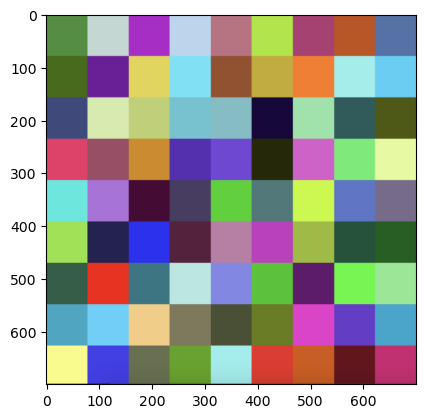

In [19]:
img_background_bgr = cv2.imread('checkerboard_color.png')
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# resizing to fit the dimensions
aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

### Create Mask for Original Image

(700, 700)


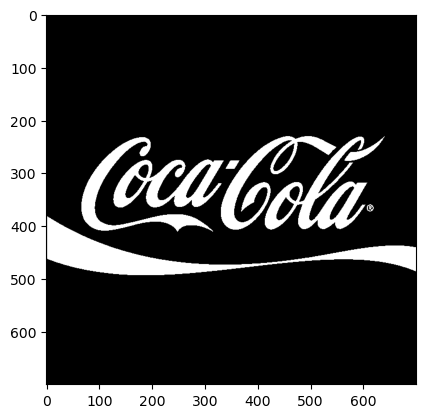

In [20]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# apply global thresholding to create binary mask of image
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap='gray')
print(img_mask.shape)

### Invert the Mask

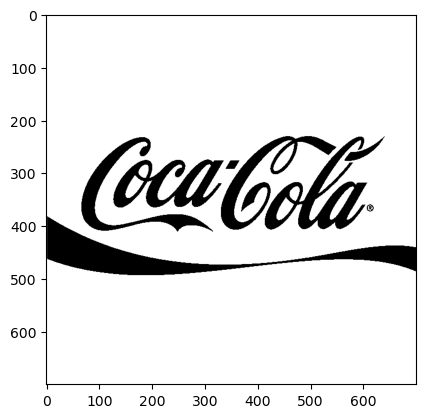

In [21]:
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap='gray')

### Apply Background on Mask

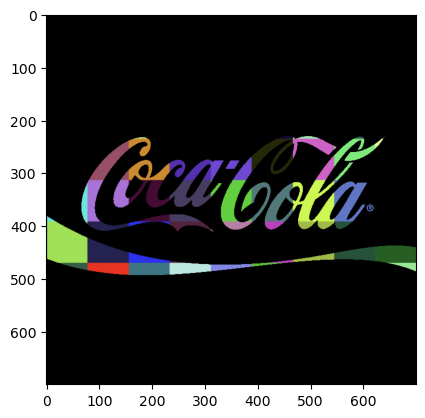

In [22]:
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

### Isolate foreground from Image

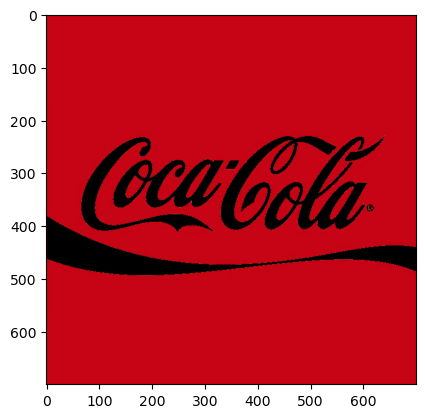

In [23]:
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

### Merge foreground and background

True

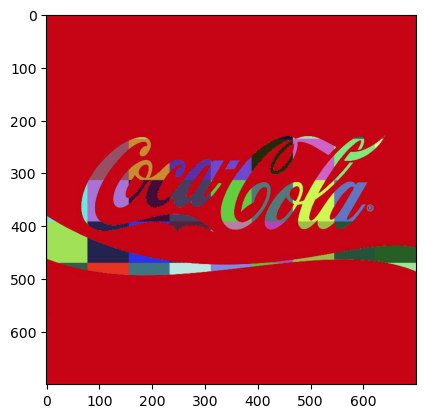

In [24]:
result = cv2.add(img_background, img_foreground)
plt.imshow(result)
cv2.imwrite('logo_final.png', result[:,:,::-1])